In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Numpy

## Basic Array Construction

In [2]:
# Can Pass a list for 1-dimensional arrays OR
# a list of lists for 2-d arrays
a = np.array([2,3,4])
b = np.array([[2.,3,4], [1,5,7]])
print "a: ", a
print "b: ", b

a:  [2 3 4]
b:  [[ 2.  3.  4.]
 [ 1.  5.  7.]]


In [3]:
a.shape

(3L,)

In [4]:
b.shape

(2L, 3L)

## Vectorized Operations

### Be careful of the dtype

In [5]:
a.dtype

dtype('int32')

In [6]:
# Division
a/2

array([1, 1, 2])

In [7]:
a.dtype

dtype('int32')

In [8]:
a = a.astype('float32')

In [9]:
a/2

array([ 1. ,  1.5,  2. ], dtype=float32)

In [10]:
a, b

(array([ 2.,  3.,  4.], dtype=float32), array([[ 2.,  3.,  4.],
        [ 1.,  5.,  7.]]))

In [11]:
a + b

array([[  4.,   6.,   8.],
       [  3.,   8.,  11.]])

Aside from the convenience of vectorized operations, there is a speed improvement as well.

In [12]:
base_python = range(1000)
numpy_array = np.array(base_python)

In [13]:
%%timeit

# Add 100 to each element
result = []
for x in base_python:
    result.append(x+100)
    


10000 loops, best of 3: 107 µs per loop


In [14]:
%%timeit

# Add 100 to each element
result2 = numpy_array + 100


The slowest run took 15.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.05 µs per loop


## Indexing and Slicing

In [15]:
a[1]

3.0

In [16]:
b[0, 2]

4.0

In [17]:
a[1:2]

array([ 3.], dtype=float32)

In [18]:
b[0, 1:3]

array([ 3.,  4.])

In [19]:
b > 2

array([[False,  True,  True],
       [False,  True,  True]], dtype=bool)

In [20]:
b[b> 2]

array([ 3.,  4.,  5.,  7.])

In [21]:
b[np.where(b>2)]

array([ 3.,  4.,  5.,  7.])

In [22]:
np.where(b>2)

(array([0, 0, 1, 1], dtype=int64), array([1, 2, 1, 2], dtype=int64))

In [23]:
zip(*np.where(b>2))

[(0, 1), (0, 2), (1, 1), (1, 2)]

In [24]:
b

array([[ 2.,  3.,  4.],
       [ 1.,  5.,  7.]])

In [25]:
np.where(b>5, 5, b)

array([[ 2.,  3.,  4.],
       [ 1.,  5.,  5.]])

## Beware of "aliasing" on Mutable Objects

Tool to Visualize Python Execution: http://www.pythontutor.com/visualize.html#mode=edit


In [26]:
# Create an array from 0 to 18 counting by 2's
c = np.arange(0,20, 2)
c

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [27]:
# Set array d equal to array c
d = c

# Check that all elements are the same
c == d

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [28]:
# Modify d to set every other element to 100
d[::2] = 100
d

array([100,   2, 100,   6, 100,  10, 100,  14, 100,  18])

In [29]:
# But What happened to c?!
c

array([100,   2, 100,   6, 100,  10, 100,  14, 100,  18])

In [30]:
# If you want, you could've created a copy instead
c = np.arange(0, 20, 2)
d = c.copy()
c == d

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [31]:
d[::2] = 100

In [32]:
print "c= ", c, '\n'
print "d= ", d

c=  [ 0  2  4  6  8 10 12 14 16 18] 

d=  [100   2 100   6 100  10 100  14 100  18]


# Common Numpy Methods

In [33]:
print "Sum= {:>6.1f}".format(  c.sum() )
print "Min= {:>6.1f}".format(  c.min() )
print "Max= {:>6.1f}".format(  c.max() )
print "Mean= {:>5.1f}".format( c.mean())
print "Mean= {:>5.1f}".format( np.mean(c))



Sum=   90.0
Min=    0.0
Max=   18.0
Mean=   9.0
Mean=   9.0


In [34]:
d

array([100,   2, 100,   6, 100,  10, 100,  14, 100,  18])

In [35]:
d.clip(4, 20)

array([20,  4, 20,  6, 20, 10, 20, 14, 20, 18])

In [36]:
rand_array = np.random.rand(10, 2)
rand_array

array([[ 0.80678081,  0.90019122],
       [ 0.58782192,  0.96588762],
       [ 0.88404715,  0.54400171],
       [ 0.06699763,  0.16481308],
       [ 0.78290728,  0.7962303 ],
       [ 0.01223234,  0.08692211],
       [ 0.8364171 ,  0.8891245 ],
       [ 0.06358148,  0.74290194],
       [ 0.08932652,  0.64687331],
       [ 0.55619308,  0.96113186]])

In [37]:
rand_array.flatten()

array([ 0.80678081,  0.90019122,  0.58782192,  0.96588762,  0.88404715,
        0.54400171,  0.06699763,  0.16481308,  0.78290728,  0.7962303 ,
        0.01223234,  0.08692211,  0.8364171 ,  0.8891245 ,  0.06358148,
        0.74290194,  0.08932652,  0.64687331,  0.55619308,  0.96113186])

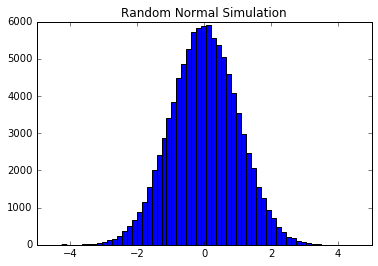

In [38]:
random_norm = np.random.normal(size=100000)

plt.hist(random_norm, bins=60);
plt.title("Random Normal Simulation");

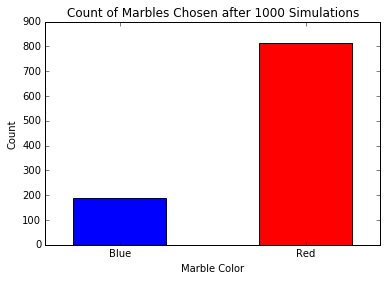

In [39]:
# Out of a bag with 20 blue marbles and 80 red marbles, 
# Choose a marble. Replace and repeat
marble_simulation = np.random.choice(['b', 'r'], size = 1000, p = [0.20, 0.80])
counts = np.unique(marble_simulation, return_counts=True)[1]

plt.bar([0, 1], counts, width = 0.5, tick_label=['Blue', 'Red'], align = 'center', color=['b', 'r'])
plt.ylabel("Count")
plt.xlabel("Marble Color")
plt.title("Count of Marbles Chosen after 1000 Simulations");

### Let's create a hypothotical stock price chart using random data

In [40]:
# We'll use normally distributed daily returns to generate the prices

def gen_random_returns(annual_return, annual_std_dev, 
                       num_days, num_simulations):
    """Generate an array of random returns. Each row in the array
    will be one simulation.
    
    Params
    ------
    annual_return: float
        Expected annual return expressed as a decimal
    annual_st_dev: float
        Expected annual standard deviation expressed as a decimal
    num_days: int
        Number of days in the simulation
    num_simulations: int
        Number of simulations to run.
    
    Returns
    -------
    returns: np.array
        Daily return string. If more than one simulation, each row will be
        a different simulation/return string.
    """
    mean_daily_return = annual_return / 252.
    daily_std_dev = annual_std_dev / np.sqrt(252)

    returns = np.random.normal(mean_daily_return, daily_std_dev, (num_simulations, num_days))
    return returns

def gen_prices(returns, start_price=100):
    """Generate an array of random price data based on a normal
    distribution of daily returns.
    
    Params
    ------
    returns: np.array
        an array of returns
    start_price: float
        Start price of the price series
    
    Returns
    -------
    prices: np.array
        Daily price string
    """
    returns[:, 0] = 0
    prices = np.cumprod(1+returns, axis=1) * start_price
    
    if prices.shape[0] ==1:
        prices = prices.flatten()
    
    return prices

def gen_random_prices(annual_return, annual_std_dev, 
                       num_days, start_price=100, num_simulations=1):
    
    returns = gen_random_returns(annual_return, annual_std_dev, 
                                 num_days, num_simulations)
    prices = gen_prices(returns, start_price)
    return prices

In [41]:
annual_return = 0.10
annual_std_dev = 0.15
num_days = 252
start_price=100

prices = gen_random_prices(annual_return, annual_std_dev, num_days, start_price)

In [42]:
# Suppress Scientific Notation Print Option in Numpy
np.set_printoptions(suppress=True)

In [43]:
# If we didn't already know the returns, we could calculate the daily returns as follows
returns = prices[1:] / prices[:-1] - 1

print "First 5 days of returns: ", returns[:5]


First 5 days of returns:  [ 0.01360647  0.02027387  0.00161135 -0.00279067  0.00084946]


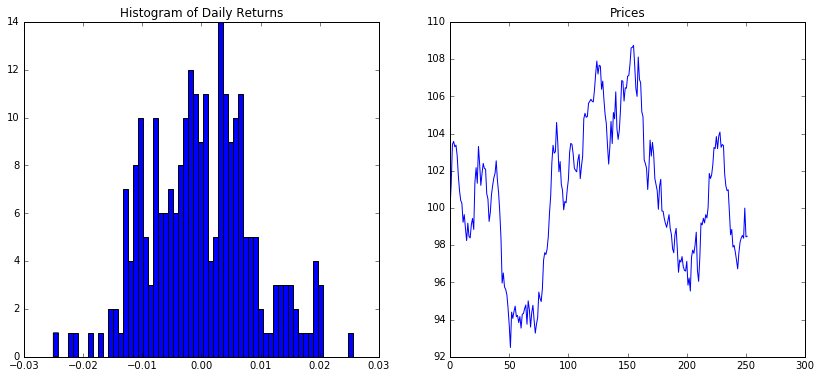

In [44]:
# Histogram of Returns
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.hist(returns, bins=60)
plt.title("Histogram of Daily Returns")

# Plot Prices to the right of the histogram
plt.subplot(122)
plt.plot(prices)
plt.title('Prices');

In [45]:
# Now Let's Generate a Monte Carlo Simulation by repeating the same
# procedure over and over 

In [46]:
def calc_shortfall_risk(prices, target_value=100):
     return np.sum(prices<target_value, axis=0, dtype='float32') / prices.shape[0]
    
# plt.plot(calc_shortfall_risk(prices))

In [47]:
def fan_plot(prices):
    """Plot a fan plot of the given 2-d prices array"""
    min_value = np.min(prices, axis=0)
    p_5 = np.percentile(prices, 5, axis=0)
    q1 = np.percentile(prices, 25, axis=0)
    median = np.percentile(prices, 50, axis=0)
    q3 = np.percentile(prices, 75, axis=0)
    p_95 = np.percentile(prices, 95, axis=0)
    max_value = np.max(prices, axis=0)

    xs = np.arange(median.shape[0])
 
    plt.axhline(median[0], color='k', label='Start Value')
    plt.plot(xs, min_value, linestyle='--', color='r', label='Min')
    plt.plot(xs, max_value, linestyle='--', color='g', label='Max')
    plt.plot(xs, median, linewidth=2, color = 'k')
    
    plt.fill_between(x=xs, y1=p_5, y2=p_95, alpha=0.5, color='lightblue', label="5-95%")
    plt.fill_between(x=xs, y1=q1, y2=q3, color='lightblue', label="25-75%")
    
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.title("Simulation Fan Plot")
    plt.xlabel("Day Number")
    plt.ylabel("Price")
    plt.margins(x=0)

# prices = gen_random_prices(annual_return, annual_std_dev, num_days, num_simulations=100)
# fan_plot(prices)

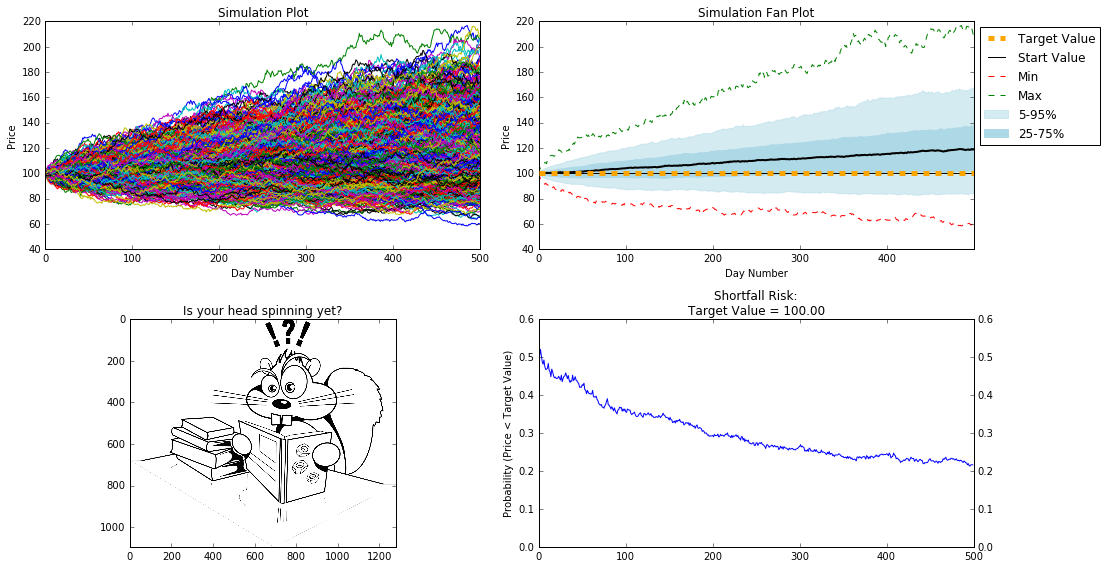

In [48]:
def monte_carlo_sim(annual_return, annual_std_dev, 
                    num_days, start_price=100, num_simulations=1,
                    target_value=100):
    """Each simulation is going to be represented by a row in an array. 
    Each column will be a different day.
    """
    
    prices = gen_random_prices(annual_return, annual_std_dev, 
                               num_days, start_price, num_simulations)
    
    # Plot All Simulations
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.plot(prices.T)
    plt.title("Simulation Plot")
    plt.ylabel("Price")
    plt.xlabel("Day Number")
    
    # Plot Fan Plot
    plt.subplot(222)
    plt.axhline(target_value, linewidth=5, linestyle='--', 
                color='orange', label='Target Value', zorder=9)
    fan_plot(prices)
    
    
    # Plot Shortfall Risk
    plt.subplot(224)
    plt.plot(calc_shortfall_risk(prices, target_value))
    plt.title("Shortfall Risk:\nTarget Value = %0.2f" % target_value)
    plt.ylabel("Probability (Price < Target Value)")
    plt.tick_params(axis='y', labelright=True)
    
    # Add Image
    img = plt.imread('squirrel-304021_1280.png')
    plt.subplot(223)
    plt.imshow(img)
    plt.tight_layout()
    plt.title("Is your head spinning yet?")

monte_carlo_sim(annual_return, annual_std_dev, num_days=500, num_simulations=1000)

## 3-D Array Manipulation

This section is meant for fun. It basically takes the squirrel picture above and converts the black lines in the image to red lines. The array slicing can get a little tricky on 3-d arrays, so I don't recommend working on this until you are comfortable with 2-d array masks and manipulation. 

As some background, the plt.imread() function reads the image file into a 3-d numpy array. Each row and column represent a pixel. And each pixel is represented by an array of 4 values (R,G,B,A). (See [this link](https://en.wikipedia.org/wiki/RGBA_color_space) for an explanation of the RGBA color model.) 



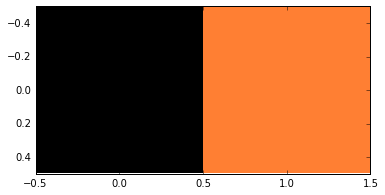

In [146]:
# Simple Example of plt.imshow() where you only pass in two pixels
plt.imshow([[ [0,0,0, 1] , [1,0.5,0.2, 1] ] ], interpolation='none');

In [135]:
# Read in the image
img = plt.imread('squirrel-304021_1280.png')
img.shape

(1095L, 1280L, 4L)

By looking at the shape of the array, you can see that the image is made up of a 1095 x 1280 pixel image. 

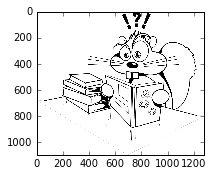

In [139]:
# Plot before any manipulation
plt.figure(figsize=(3,3))
plt.imshow(img);

In [140]:
# This mask returns a tuple of length 2 giving the indices
# Of any black pixels.
mask = np.where((img[:,:,0]==0) & 
                (img[:,:,1]==0) & 
                (img[:,:,2]==0) &
                (img[:,:,3]!= 0)
               )

mask

(array([  0,   0,   0, ..., 981, 982, 983], dtype=int64),
 array([747, 748, 752, ..., 719, 719, 719], dtype=int64))

In [141]:
# Create an array of pixel values so that the R value equals 1
replacement = img[mask]
replacement[:, 0] = 1
replacement

array([[ 1.        ,  0.        ,  0.        ,  0.01568628],
       [ 1.        ,  0.        ,  0.        ,  0.00784314],
       [ 1.        ,  0.        ,  0.        ,  0.09803922],
       ..., 
       [ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ]], dtype=float32)

In [142]:
# Replace these new pixels in the original image
img[mask] = replacement

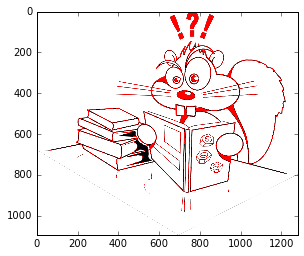

In [143]:
# Plot your results!
plt.imshow(img);

Note it looks like I missed some pixels somehow as there is still some black in the books. I'll leave that to you to figure out.

### Computational Time
### Pure Python vs. Numpy

How long does this picture/array conversion take using pure python as compared to using numpy?

In [199]:
def plot_img(img):
    plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img);

In [200]:
# Read in the image
img = plt.imread('squirrel-304021_1280.png')

##### Time Using Pure Python

In [207]:
img2 = img.copy()

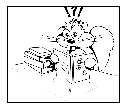

In [208]:
plot_img(img2)

In [209]:
%%timeit
for row in img2:
    for col in row:
        if all([col[0]==0, col[1]==0, col[2]==0, col[3]!=0]):
            col[0]=1

1 loop, best of 3: 10.6 s per loop


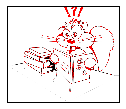

In [210]:
plot_img(img2)

Using nested loops in pure python took about 10.6 seconds to convert the image.

##### Using Numpy

In [211]:
img3 = img.copy()

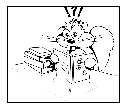

In [212]:
plot_img(img3)

In [214]:
%%timeit
mask = np.where((img3[:,:,0]==0) & 
                (img3[:,:,1]==0) & 
                (img3[:,:,2]==0) &
                (img3[:,:,3]!= 0)
               )

mask

replacement = img3[mask]
replacement[:, 0] = 1
replacement

img3[mask] = replacement

10 loops, best of 3: 18.6 ms per loop


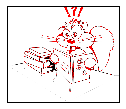

In [231]:
plot_img(img3);

Using our numpy procedure took only 18.6 milliseconds.

##### Comparision

In [229]:
print ("Using Numpy for this task is {:,.0f} times faster than using pure python!"
       .format(10.6 / 18.6e-3) )

Using Numpy for this task is 570 times faster than using pure python!
